# Unmatched candidates (Sat Apr 27)

Revise original instructional notebook to help (Sat Apr 27).

As described in Section 2.2 of the paper draft, the DECam DDF candidates were cross-matched to the DESI Legacy Imaging Suvey's Tractor Catalog.

What are they, are they interesting? High-redshift?

## 1. Set up the notebook

### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Set plot parameters

In [2]:
all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

### Read files

Files all have headers that explain the columns.
Use the terminal to navigate to the directory of a file 
and type `more <filename`, see the header lines
prefixed with `#`, then type `q` to return to an
active command line.

Read the candidates' light curve data.

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

Read the candidates' light curve summary parameters.

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'
paramLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
paramLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
paramLC_tspan = np.loadtxt(fnm, dtype='float', usecols=(2))
paramLC_tspan_g = np.loadtxt(fnm, dtype='float', usecols=(3))
paramLC_tspan_r = np.loadtxt(fnm, dtype='float', usecols=(4))
paramLC_tspan_i = np.loadtxt(fnm, dtype='float', usecols=(5))
paramLC_minmag = np.loadtxt(fnm, dtype='float', usecols=(6))
paramLC_minmag_g = np.loadtxt(fnm, dtype='float', usecols=(7))
paramLC_minmag_r = np.loadtxt(fnm, dtype='float', usecols=(8))
paramLC_minmag_i = np.loadtxt(fnm, dtype='float', usecols=(9))
paramLC_amp = np.loadtxt(fnm, dtype='float', usecols=(10))
paramLC_amp_g = np.loadtxt(fnm, dtype='float', usecols=(11))
paramLC_amp_r = np.loadtxt(fnm, dtype='float', usecols=(12))
paramLC_amp_i = np.loadtxt(fnm, dtype='float', usecols=(13))
paramLC_neps = np.loadtxt(fnm, dtype='int', usecols=(14))
paramLC_neps_g = np.loadtxt(fnm, dtype='int', usecols=(15))
paramLC_neps_r = np.loadtxt(fnm, dtype='int', usecols=(16))
paramLC_neps_i = np.loadtxt(fnm, dtype='int', usecols=(17))
del fnm

Read the candidates' cross-match results.

In [5]:
fnm = '../cross_matched_LSDR10/candidate_xmatch_LSdr10.dat'
lsdr10xm_candid   = np.loadtxt(fnm, dtype='str', usecols=(0))
lsdr10xm_candra   = np.loadtxt(fnm, dtype='float', usecols=(1))
lsdr10xm_canddec  = np.loadtxt(fnm, dtype='float', usecols=(2))
lsdr10xm_flagstar = np.loadtxt(fnm, dtype='int', usecols=(4))
lsdr10xm_flagcore = np.loadtxt(fnm, dtype='int', usecols=(5))
lsdr10xm_flagmatch= np.loadtxt(fnm, dtype='int', usecols=(6))
lsdr10xm_sep      = np.loadtxt(fnm, dtype='float', usecols=(7))
lsdr10xm_ra       = np.loadtxt(fnm, dtype='float', usecols=(8))
lsdr10xm_dec      = np.loadtxt(fnm, dtype='float', usecols=(9))
lsdr10xm_rmag     = np.loadtxt(fnm, dtype='float', usecols=(13))
lsdr10xm_type     = np.loadtxt(fnm, dtype='str', usecols=(15))
lsdr10xm_shaper   = np.loadtxt(fnm, dtype='float', usecols=(19))
lsdr10xm_rpsfsize = np.loadtxt(fnm, dtype='float', usecols=(21))  
lsdr10xm_meanpz   = np.loadtxt(fnm, dtype='float', usecols=(23))
lsdr10xm_stdpz    = np.loadtxt(fnm, dtype='float', usecols=(24))
lsdr10xm_specz    = np.loadtxt(fnm, dtype='float', usecols=(25))
del fnm

Read the candidates' links to Legacy Survey viewer (lsview) and to Rob Knop's candidate viewer (rkview).

In [6]:
fnm = '../cross_matched_LSDR10/candidate_links.dat'
link_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
link_lsview = np.loadtxt(fnm, dtype='str', usecols=(1))
link_rkview = np.loadtxt(fnm, dtype='str', usecols=(2))
del fnm

### Find the unmatched candidates

The header of the file `candidate_xmatch_LSdr10.dat` specifies that
the third column (with index 4), which was read into `lsdr10xm_flagstar`,
contains a flag value that indicates if the candidate was matched or not.

```
#  4 : Flag: 1 if matched to a star; 0 if matched to a galaxy; -1 if unmatched (int) 
```


In [7]:
tx = np.where(lsdr10xm_flagstar == -1)[0]
print('Number of unmatched candidates: ', len(tx))

unmatched_candid = lsdr10xm_candid[tx]
print(unmatched_candid)

del tx

Number of unmatched candidates:  137
['DC21bypav' 'DC21cbkfe' 'DC21cgwg' 'DC21cinh' 'DC21ckfs' 'DC21ckge'
 'DC21cveh' 'DC21cvsig' 'DC21cwzwo' 'DC21cxffz' 'DC21cyodf' 'DC21czwvf'
 'DC21dglus' 'DC21djvpn' 'DC21djxfx' 'DC21dkhvw' 'DC21efoi' 'DC21fbia'
 'DC21fbtw' 'DC21fcrl' 'DC21fdtb' 'DC21fhuj' 'DC21frwb' 'DC21fumn'
 'DC21fwyo' 'DC21gaio' 'DC21gbkj' 'DC21ghtg' 'DC21gipk' 'DC21gjcp'
 'DC21gqwm' 'DC21jinc' 'DC21mjrj' 'DC22dvqad' 'DC22dvzzk' 'DC22dwcml'
 'DC22ebohx' 'DC22edhli' 'DC22enoah' 'DC22enurv' 'DC22enwuh' 'DC22gtgtr'
 'DC22gthex' 'DC22gtjsd' 'DC22gtkhm' 'DC22gtkiq' 'DC22gtlrp' 'DC22gtrdr'
 'DC22gtwth' 'DC22gtxpt' 'DC22guctp' 'DC22gudje' 'DC22gudtj' 'DC22gueme'
 'DC22guflp' 'DC22gufog' 'DC22gugox' 'DC22gugre' 'DC22gugtl' 'DC22guguo'
 'DC22guhif' 'DC22gukms' 'DC22gupgh' 'DC22guyix' 'DC22guywa' 'DC22gvcym'
 'DC22gwear' 'DC22hisau' 'DC22ibvrq' 'DC22ihqdt' 'DC22irumm' 'DC22irvse'
 'DC22isarh' 'DC22iymwd' 'DC23jglyk' 'DC23jjlpf' 'DC23jjmgi' 'DC23jmxkg'
 'DC23jnfjk' 'DC23jngto' 'DC23joidg'

Create a flag for the `paramLC` arrays that is 1 if the candidate is unmatched, 0 otherwise.

In [8]:
paramLC_unmatched = np.zeros(len(paramLC_candid), dtype='int')
for candid in unmatched_candid:
    ix = np.where(paramLC_candid == candid)[0]
    paramLC_unmatched[ix[0]] = 1
    del ix

### Characterize the unmatched candidates

How many candidates were detected in only a single epoch?

These might be asteroids, or could be flares of faint stars.

#eps  # unmatched cands
1       86
2       8
3       4
4       4
5       6
6       6
7       6
8       5
9       1
10       4
12       1
17       1
18       1
27       1
32       1
33       1
54       1
 
Number detected on more than one night:  51


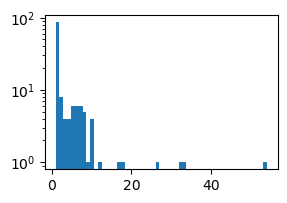

In [9]:
print('#eps  # unmatched cands')
tx = np.where(paramLC_unmatched == 1)[0]
values, counts = np.unique(paramLC_neps[tx], return_counts=True)
for val, cnt in zip(values, counts):
    print(val, '     ', cnt)
    
print(' ')
ix = np.where(values > 1)[0]
print('Number detected on more than one night: ', np.sum(counts[ix]))

fig = plt.figure(figsize=(3, 2))
plt.hist(paramLC_neps[tx], bins=55, log=True)
plt.show()

del tx, values, counts, ix

## 2. Review the environment with the Legacy Viewer links

Visually revew the candidates were unmatched AND were detected on more than one night.

Are they in truly empty space, or is there something faint there?
Perhaps did something go wrong with the matching?

Keep track of the results of the reivew.

For example, make a file called, e.g., "unmatched_candidates_review.txt".
Have column 1 be the candidate name, column 2 a flag, 
and maybe after that have notes.

The flag values might be, e.g., 
0 for blank area, 
1 for faint things nearby,
2 for bright things nearby,
3 for star right at candidate location,
4 for galaxy right at candidate location.

In [10]:
tx = np.where((paramLC_unmatched == 1) & (paramLC_neps > 1))[0]
for x in tx:
    cx = np.where(link_candid == paramLC_candid[x])[0]
    print(paramLC_candid[x])
    print(link_lsview[cx[0]])
    print(link_rkview[cx[0]])
    print(' ')
del tx

DC21cveh
https://www.legacysurvey.org/viewer/cutout.jpg?ra=149.051840432835&dec=1.22544206954052&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21cveh
 
DC21cvsig
https://www.legacysurvey.org/viewer/cutout.jpg?ra=8.5223824969266&dec=-42.7971134973035&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21cvsig
 
DC21cwzwo
https://www.legacysurvey.org/viewer/cutout.jpg?ra=8.92589560388332&dec=-42.8283504447777&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21cwzwo
 
DC21cxffz
https://www.legacysurvey.org/viewer/cutout.jpg?ra=10.5012946777931&dec=-43.7855525715769&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21cxffz
 
DC21czwvf
https://www.legacysurvey.org/viewer/cutout.jpg?ra=9.57259032785296&dec=-44.7183297575827&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21czwvf
 
DC21dglus
https://www.legacysurvey.org/viewer/cutout.jpg?ra=8.63253607227684&dec=-42

## 3. Plot the light curves of unmatched candidates

Visually review the light curves. Do any stand out as interesting?

Perhaps create another flag file to keep track of the results
of your review of the candidate light curves.

### Menagerie 

This cell creates a big grid of the 51 multi-night unmatched candidates.

This won't be good for the paper it's just for visual review.

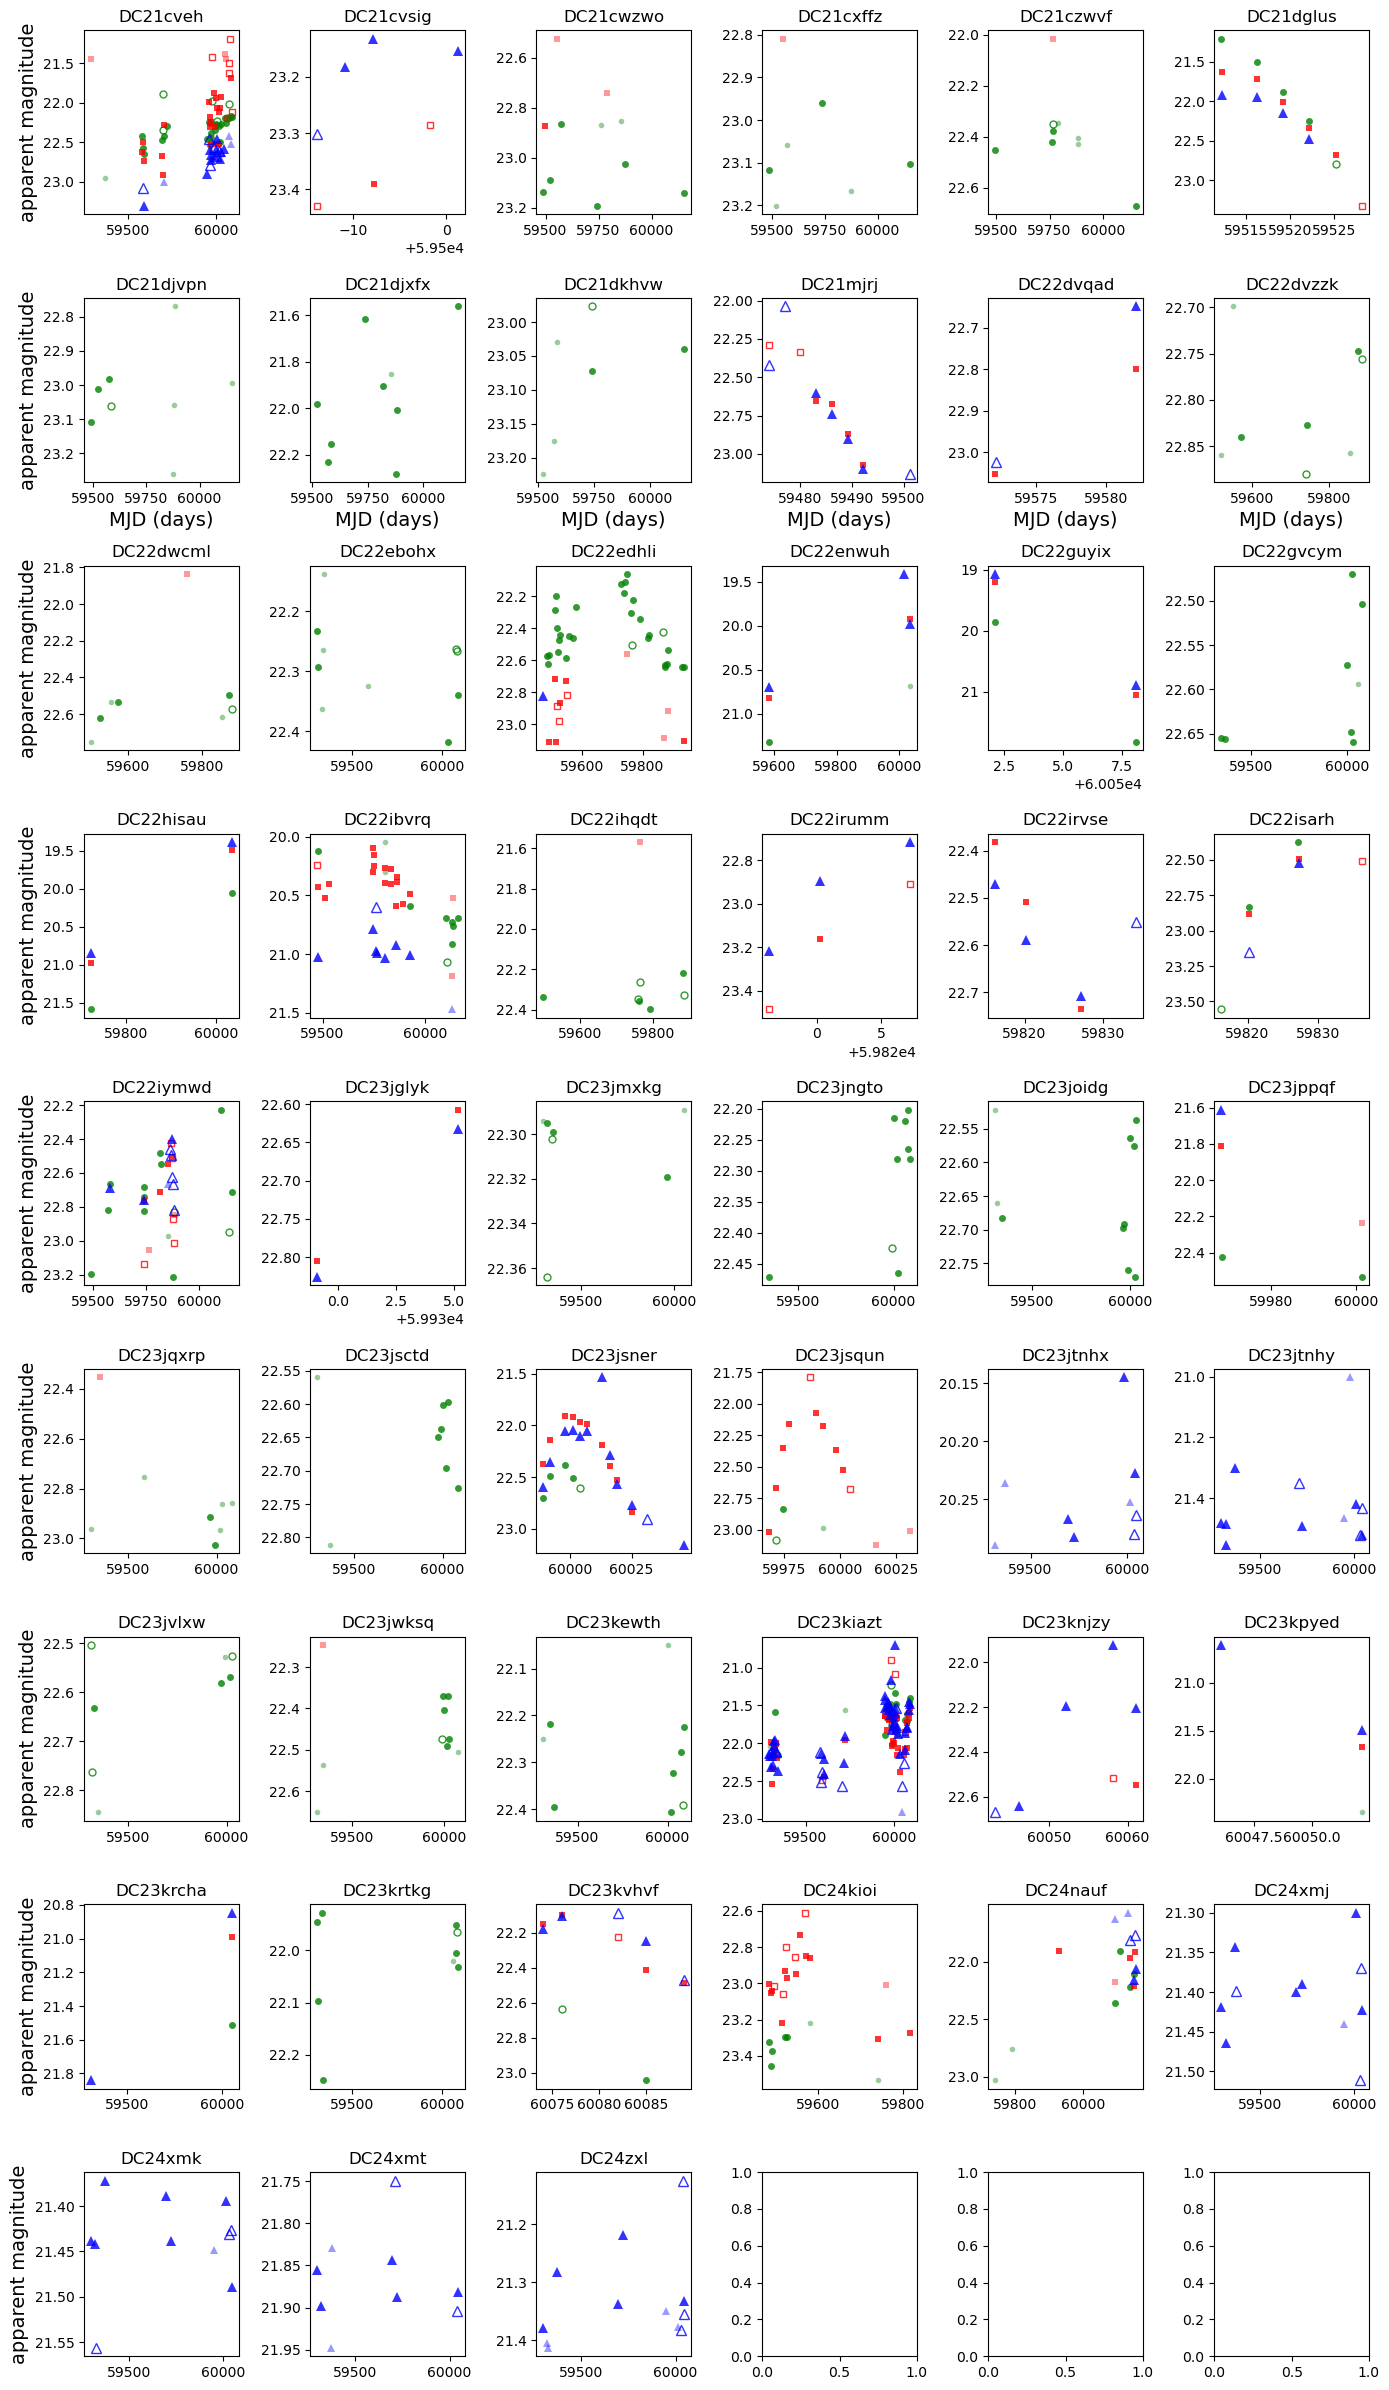

In [11]:
nrow = 9
ncol = 6
fig, ax = plt.subplots( nrow, ncol, figsize=(14, 24), sharex=False, sharey=False )

tx = np.where((paramLC_unmatched == 1) & (paramLC_neps > 1))[0]

x = 0
for i in range(nrow):
    ax[i, 0].set_ylabel('apparent magnitude', fontsize=14)
    for j in range(ncol):
        if x < len(tx):
            for f,filt in enumerate(all_filters):
                cx0 = np.where((candLC_candid == paramLC_candid[tx[x]]) & \
                               (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
                cx1 = np.where((candLC_candid == paramLC_candid[tx[x]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
                cx2 = np.where((candLC_candid == paramLC_candid[tx[x]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
                ax[i, j].plot(candLC_mjd[cx0], candLC_mag[cx0], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
                ax[i, j].plot(candLC_mjd[cx1], candLC_mag[cx1], 
                             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
                ax[i, j].plot(candLC_mjd[cx2], candLC_mag[cx2], 
                             all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            cx = np.where(candLC_candid == paramLC_candid[tx[x]])[0]
            xmin = np.min(candLC_mjd[cx])
            xmax = np.max(candLC_mjd[cx])
            ax[i, j].invert_yaxis()
            buffer = 0.05 * (xmax - xmin)
            ax[i, j].set_xlim([xmin-buffer, xmax+buffer])
            del xmin, xmax, buffer
            ax[i, j].set_title(paramLC_candid[tx[x]])
            x += 1
            
# ax[0, 1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)
for j in range(ncol):
    ax[1, j].set_xlabel('MJD (days)', fontsize=14)

plt.tight_layout()
plt.show()
del tx, x

### Individual PNG files.

This cell creates an individual PNG file for each light curve.
The PNG light curve plots will be stored in the folder `plots_lightcurves/`.
The filename will be the candidate name.

In [12]:
for c, candid in enumerate(unmatched_candid):
    fig = plt.figure(figsize=(8, 6))
    for f,filt in enumerate(all_filters):
        
        # index regular, poor-RB, and lonely epochs
        cx0 = np.where((candLC_candid == candid) & \
                       (candLC_filter == filt) & 
                       (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == candid) & \
                       (candLC_filter == filt) & 
                       (candLC_mrb <= 0.4) & 
                       (candLC_lef == 0))[0]
        cx2 = np.where((candLC_candid == candid) & \
                       (candLC_filter == filt) & 
                       (candLC_mrb <= 0.4) & 
                       (candLC_lef == 1))[0]
        
        # plot the regular, poor-RB, and lonely epochs
        # with different symbol types
        plt.plot(candLC_mjd[cx0], candLC_mag[cx0], 
                 all_fshapes[f], ms=all_fsizes[f], 
                 mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
        plt.plot(candLC_mjd[cx1], candLC_mag[cx1], 
                 all_fshapes[f], ms=all_fsizes[f], 
                 mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
                 label=filt+' (R/B<0.4)')
        plt.plot(candLC_mjd[cx2], candLC_mag[cx2], 
                 all_fshapes[f], ms=all_fsizes[f]-1, 
                 mew=0, alpha=0.4, color=all_fcolors[f])
        
        # clean up
        del cx0, cx1, cx2
    
    # set the x-axis limits & label
    cx = np.where(candLC_candid == candid)[0]
    xmin = np.min(candLC_mjd[cx])
    xmax = np.max(candLC_mjd[cx])
    plt.xlim([xmin- 5.0, xmax + 5.0])
    del cx, xmin, xmax
    plt.xlabel('MJD-59300', fontsize=14)
    
    # set the y-axis limits & label
    plt.gca().invert_yaxis()
    plt.ylabel('mag', fontsize=14)
    
    # title and legend, then save and close
    plt.title(candid)
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.savefig('plots_lightcurves/'+candid+'.png')
    plt.close()

## 4. Cross-match with other potential transient types

Cross-check the names of the 51 unmatched candidates with the lists
made for potential SNIa, SNIIP, and fast transients.

In [13]:
tx = np.where((paramLC_unmatched == 1) & (paramLC_neps > 1))[0]

In [14]:
fnm = '../SNIa/potential_snia_list.dat'
pot_SNIa = np.loadtxt(fnm, dtype='str', usecols=(0)) 
for x in tx:
    mx = np.where(paramLC_candid[x] == pot_SNIa)[0]
    if len(mx) == 1:
        print(pot_SNIa[mx[0]])
del fnm, pot_SNIa

DC21dglus
DC21mjrj
DC23jsner


In [15]:
fnm = '../SNIIP/potential_sniip_list.dat'
pot_SNIIP = np.loadtxt(fnm, dtype='str', usecols=(0)) 
for x in tx:
    mx = np.where(paramLC_candid[x] == pot_SNIIP)[0]
    if len(mx) == 1:
        print(pot_SNIIP[mx[0]])
del fnm, pot_SNIIP

In [16]:
fnm = '../fast_transients/potential_FT_list.dat'
pot_FTs = np.loadtxt(fnm, dtype='str', usecols=(0)) 
for x in tx:
    mx = np.where(paramLC_candid[x] == pot_FTs)[0]
    if len(mx) == 1:
        print(pot_FTs[mx[0]])
del fnm, pot_FTs

## 5. (Optional) Plot distributions of light curve summary parameters

The calculated light curve summary paramters are described
in Section 2.1 of the paper draft.

Distributions and relationships of these summary parameters
are shown in Figures 1 and 2 of the paper draft.

Make plots that compare the distributions and relations
of these summary parameters for the unmatched candidates
to all of the candidates.
Save them in the `plots_lcsummary/` directory.

E.g., recreate histograms/distributions
as in Figs 1/2 of paper draft
but overplot histograms/distributions of
just the unmatched candidates.

Do the unmatched candidates occupy any particular part
of parameter space? E.g., do they mostly have smaller
amplitudes, larger durations, or anything else notable?

To see how the plots in Figs 1/2 were made, can look at
`transients_science/explore_nightly_epoch_summary.ipynb`.

### Quicklook plots by MLG

MLG has made the following plots preliminarily, as quick checks;
would need more work if they need to go in paper (e.g., resized, etc.)

In [17]:
ax = np.where(paramLC_neps > 1)[0]
tx = np.where((paramLC_unmatched == 1) & (paramLC_neps > 1))[0]
gx = np.where(paramLC_neps_g[tx] > 1)[0]
rx = np.where(paramLC_neps_r[tx] > 1)[0]
ix = np.where(paramLC_neps_i[tx] > 1)[0]

print('Number of candidates with >1 night of detections: ', len(ax))
print('Number of unmatched candidates with >1 night of detections: ', len(tx))
print('Number of unmatched candidates with >1 night of detections in g: ', len(gx))
print('Number of unmatched candidates with >1 night of detections in r: ', len(rx))
print('Number of unmatched candidates with >1 night of detections in i: ', len(ix))

Number of candidates with >1 night of detections:  1848
Number of unmatched candidates with >1 night of detections:  51
Number of unmatched candidates with >1 night of detections in g:  35
Number of unmatched candidates with >1 night of detections in r:  22
Number of unmatched candidates with >1 night of detections in i:  27


#### Number of epochs.

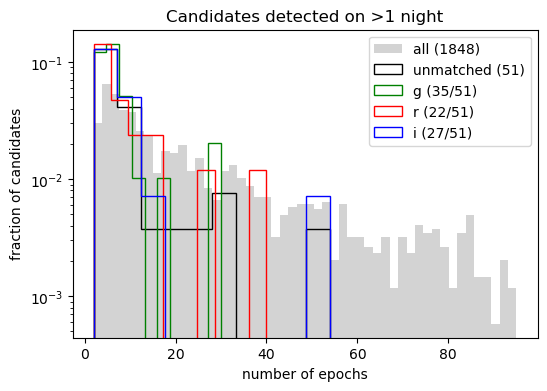

In [18]:
fig = plt.figure(figsize=(6, 4))
plt.hist(paramLC_neps[ax], bins=50, log=True, density=True, color='lightgrey', label='all (1848)')
plt.hist(paramLC_neps[tx], bins=10, histtype='step', log=True, density=True, color='black', label='unmatched (51)')
plt.hist(paramLC_neps_g[tx[gx]], bins=10, histtype='step', log=True, density=True, color=all_fcolors[0], label='g ('+str(len(gx))+'/51)')
plt.hist(paramLC_neps_r[tx[rx]], bins=10, histtype='step', log=True, density=True, color=all_fcolors[1], label='r ('+str(len(rx))+'/51)')
plt.hist(paramLC_neps_i[tx[ix]], bins=10, histtype='step', log=True, density=True, color=all_fcolors[2], label='i ('+str(len(ix))+'/51)')
plt.xlabel('number of epochs')
plt.ylabel('fraction of candidates')
plt.legend(loc='upper right')
plt.title('Candidates detected on >1 night')
plt.show()

#### Time span

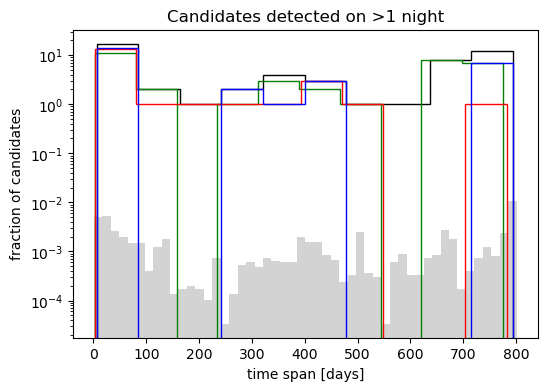

In [19]:
fig = plt.figure(figsize=(6, 4))
plt.hist(paramLC_tspan[ax], bins=50, log=True, density=True, color='lightgrey')
plt.hist(paramLC_tspan[tx], bins=10, histtype='step', log=True, color='black')
plt.hist(paramLC_tspan_g[tx[gx]], bins=10, histtype='step', log=True, color=all_fcolors[0])
plt.hist(paramLC_tspan_r[tx[rx]], bins=10, histtype='step', log=True, color=all_fcolors[1])
plt.hist(paramLC_tspan_i[tx[ix]], bins=10, histtype='step', log=True, color=all_fcolors[2])
plt.xlabel('time span [days]')
plt.ylabel('fraction of candidates')
plt.title('Candidates detected on >1 night')
plt.show()

#### Brightest magnitude


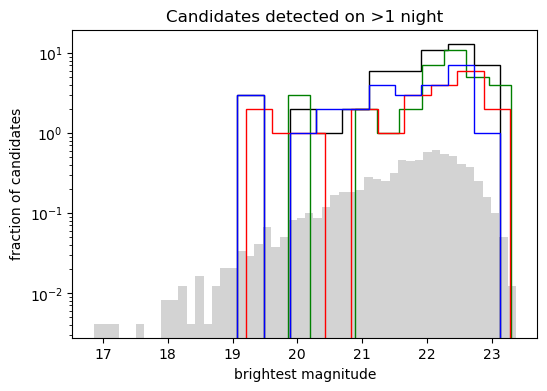

In [20]:
fig = plt.figure(figsize=(6, 4))
plt.hist(paramLC_minmag[ax], bins=50, log=True, density=True, color='lightgrey')
plt.hist(paramLC_minmag[tx], bins=10, histtype='step', log=True, color='black')
plt.hist(paramLC_minmag_g[tx[gx]], bins=10, histtype='step', log=True, color=all_fcolors[0])
plt.hist(paramLC_minmag_r[tx[rx]], bins=10, histtype='step', log=True, color=all_fcolors[1])
plt.hist(paramLC_minmag_i[tx[ix]], bins=10, histtype='step', log=True, color=all_fcolors[2])
plt.xlabel('brightest magnitude')
plt.ylabel('fraction of candidates')
plt.title('Candidates detected on >1 night')
plt.show()

#### Amplitude


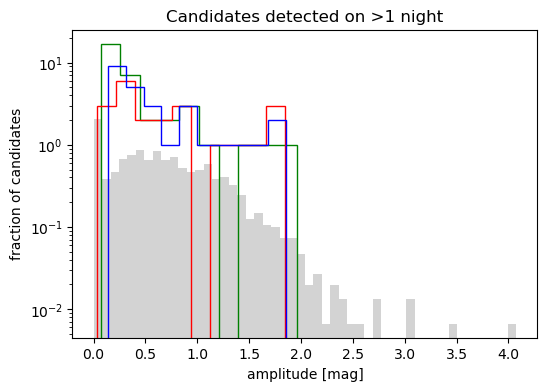

In [21]:
fig = plt.figure(figsize=(6, 4))
plt.hist(paramLC_amp_r[ax], bins=50, log=True, density=True, color='lightgrey')
plt.hist(paramLC_amp_g[tx[gx]], bins=10, histtype='step', log=True, color=all_fcolors[0])
plt.hist(paramLC_amp_r[tx[rx]], bins=10, histtype='step', log=True, color=all_fcolors[1])
plt.hist(paramLC_amp_i[tx[ix]], bins=10, histtype='step', log=True, color=all_fcolors[2])
plt.xlabel('amplitude [mag]')
plt.ylabel('fraction of candidates')
plt.title('Candidates detected on >1 night')
plt.show()

#### Summary of quicklook plots

Since the number of unmatched candidates is much lower than the number of
all candidates detected on >1 night, comparing the histograms above
is challenging.
Possibly if they were plotted as cumulative histograms, the visual 
comparison would be more informative.
A Kolmogorov-Smirnov Test between the "all" histogram and the histogram
for a given filter could be done to see if they're consistent.

But overall I think we could say simply that in general, the
light curve parameters of the unmatched candidates do not, as a group,
deviate significantly from all the rest.


In [22]:
del ax, tx, gx, rx, ix